<a href="https://colab.research.google.com/github/mukul-B/nnunetExp/blob/main/HippocampusTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nnunet --log check.txt

     |████████████████████████████████| 251 kB 32.9 MB/s 
     |████████████████████████████████| 151 kB 61.5 MB/s 
     |████████████████████████████████| 61 kB 352 kB/s 
     |████████████████████████████████| 48.4 MB 30 kB/s 
     |████████████████████████████████| 96 kB 7.3 MB/s 
     |████████████████████████████████| 2.0 MB 29.1 MB/s 
  Created wheel for nnunet: filename=nnunet-1.7.0-py3-none-any.whl size=487821 sha256=67cd457b2bf1dad460a7bf00274f7a42336edd4ff6180bf8dace06561e2e25ef
  Stored in directory: /root/.cache/pip/wheels/66/f6/19/c51389976a9ae30212178d1c41497893504b900f043fe1c665
  Created wheel for batchgenerators: filename=batchgenerators-0.24-py3-none-any.whl size=89210 sha256=0e348c474bcb9b5ca3eecce1280f680b19fdf2cf98b0b63ad4a3c4da0826cbbc
  Stored in directory: /root/.cache/pip/wheels/56/d7/ca/6b43d8fbc8e1d38a89e902cd0cf5aeeb35501ba3c95e3ce8e7
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.3-py3-none-any.whl size=44349 sha256=1001f149cc153f30a21025a81b2755

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['nnUNet_preprocessed'] = "/content/nnunet_exp/nnUNet_preprocessed"
os.environ['RESULTS_FOLDER'] = "/content/drive/MyDrive"
# os.environ['RESULTS_FOLDER'] = "/media/fabian/nnUNet_trained_models"
os.environ['nnUNet_raw_data_base'] = "/content/nnunet_exp/nnUNet_raw_data_base"

In [4]:
!ls nnunet_exp
!rm -r nnunet_exp/nnUNet_preprocessed
!rm -r nnunet_exp/nnUNet_trained_models
!rm -r nnunet_exp/nnUNet_raw_data_base
!rm -r nnunet_exp

!mkdir nnunet_exp
!mkdir nnunet_exp/nnUNet_preprocessed
!mkdir nnunet_exp/nnUNet_trained_models
!mkdir nnunet_exp/nnUNet_raw_data_base

ls: cannot access 'nnunet_exp': No such file or directory
rm: cannot remove 'nnunet_exp/nnUNet_preprocessed': No such file or directory
rm: cannot remove 'nnunet_exp/nnUNet_trained_models': No such file or directory
rm: cannot remove 'nnunet_exp/nnUNet_raw_data_base': No such file or directory
rm: cannot remove 'nnunet_exp': No such file or directory


In [5]:
!bash /content/drive/MyDrive/preProcess.sh 4 Task04_Hippocampus Task004_Hippocampus

Streaming output truncated to the last 5000 lines.
before crop: (1, 40, 50, 36) after crop: (1, 40, 50, 36) spacing: [1. 1. 1.] 

hippocampus_264
before crop: (1, 38, 46, 35) after crop: (1, 38, 46, 35) spacing: [1. 1. 1.] 

before crop: (1, 37, 51, 38) after crop: (1, 37, 51, 38) spacing: [1. 1. 1.] 

hippocampus_374
hippocampus_321
hippocampus_165
before crop: (1, 39, 48, 38) after crop: (1, 39, 48, 38) spacing: [1. 1. 1.] 
hippocampus_333
hippocampus_108

before crop: (1, 29, 49, 34) after crop: (1, 29, 49, 34) spacing: [1. 1. 1.] 
before crop: (1, 34, 46, 34) after crop: (1, 34, 46, 34) spacing: [1. 1. 1.] 


before crop: (1, 38, 46, 33) after crop: (1, 38, 46, 33) spacing: [1. 1. 1.] 

before crop: (1, 37, 53, 36) after crop: (1, 37, 53, 36) spacing: [1. 1. 1.] 
hippocampus_194

hippocampus_385
before crop: (1, 30, 50, 35) after crop: (1, 30, 50, 35) spacing: [1. 1. 1.] 

before crop: (1, 40, 48, 35) after crop: (1, 40, 48, 35) spacing: [1. 1. 1.] 

hippocampus_287
hippocampus_221

Unet with SGD

In [64]:
os.environ['OUTPUT_DIRECTORY'] = "output_sgd"
os.environ['fold'] = "fold_4"
os.environ['foldin'] = "4"
os.environ['plan']="nnUNetTrainerV2__nnUNetPlansv2.1"

deep Supervision

In [61]:
os.environ['OUTPUT_DIRECTORY'] = "output_dp"
os.environ['fold'] = "fold_4"
os.environ['foldin'] = "4"
os.environ['plan']="nnUNetTrainerV2_DP__nnUNetPlansv2.1"

Adam Optimizer change

In [62]:
os.environ['OUTPUT_DIRECTORY'] = "output_adam"
os.environ['fold'] = "fold_1"
os.environ['foldin'] = "1"
os.environ['plan']="nnUNetTrainerV2__nnUNetPlansv2.1"

Load Model and Predict

In [56]:
#best modeal ans final model

!cp /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/${plan}/$fold/model_best.model.pkl /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/${plan}/$fold/model_final_checkpoint.model.pkl
!cp /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/${plan}/$fold/model_best.model /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/${plan}/$fold/model_final_checkpoint.model


In [57]:
#best modeal ans final model
!nnUNet_install_pretrained_model_from_zip /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/${plan}/$fold/model_final_checkpoint.model



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [58]:
#Getting Pridiction
!nnUNet_predict -i $nnUNet_raw_data_base/nnUNet_raw_data/Task004_Hippocampus/imagesTs/ -o $OUTPUT_DIRECTORY -f ${foldin} -t 4 -m 2d



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/MyDrive/nnUNet/2d/Task004_Hippocampus/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 130 unique case ids, here are some examples: ['hippocampus_140' 'hippocampus_206' 'hippocampus_272' 'hippocampus_021'
 'hippocampus_122' 'hippocampus_198' 'hippocampus_307' 'hippocampus_012'
 'hippocampus_063' 'hippocampus_116']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 130
number of cases that still need to be predicted: 130
emptying cuda cache
loading parameters for folds, [1]
using the

**Evaluation**

In [59]:
# preprocessing for evaluation

os.chdir("/content")
%cd /content
!pwd
!rm -r /content/${OUTPUT_DIRECTORY}2
!cp -r /content/${OUTPUT_DIRECTORY} /content/${OUTPUT_DIRECTORY}2
os.chdir(os.environ['OUTPUT_DIRECTORY']+"2")
!for f in *.nii.gz; do mv "$f" "${f%.nii.gz}"_0000.nii.gz; done;
%cd /content
os.chdir("/content")
!pwd

/content
/content
rm: cannot remove '/content/output_adam2': No such file or directory
/content
/content


In [60]:
!nnUNet_evaluate_folder -ref $nnUNet_raw_data_base/nnUNet_raw_data/Task004_Hippocampus/imagesTs/ -pred /content/${OUTPUT_DIRECTORY}2 -l 1 2



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

OrderedDict([('all', [OrderedDict([('1', OrderedDict([('Accuracy', 0.9755561617263745), ('Dice', 0.0), ('False Discovery Rate', 1.0), ('False Negative Rate', nan), ('False Omission Rate', 0.0), ('False Positive Rate', 0.024443838273625507), ('Jaccard', 0.0), ('Negative Predictive Value', 1.0), ('Precision', 0.0), ('Recall', nan), ('Total Positives Reference', 0), ('Total Positives Test', 1613), ('True Negative Rate', 0.9755561617263745)])), ('2', OrderedDict([('Accuracy', 0.9791628780990483), ('Dice', 0.0), ('False Discovery Rate', 1.0), ('False Negative Rate', 1.0), ('False Omission Rate', 1.5476522115950103e-05), ('False Positiv

**Display Results**

In [38]:
import os
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import matplotlib.pyplot as plt

def display_results(test,test_seg):
  base="/content/nnunet_exp/nnUNet_raw_data_base/nnUNet_raw_data/Task004_Hippocampus/"

  test_load = nib.load(base+test).get_fdata()
  test_seg_load = nib.load(test_seg).get_fdata()
  print(test_load.shape[2])
  for i in range(test_load.shape[2]-1):
    print(i)
    test = test_load[:,:,i]
    test_seg = test_seg_load[:,:,i]
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(test)
    axarr[1].imshow(test_seg)
    plt.show()

36
0


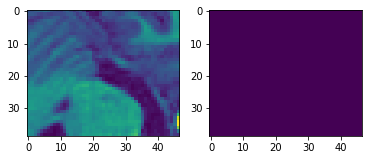

1


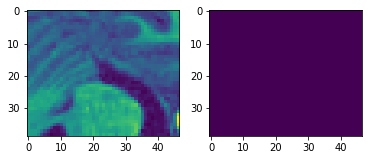

2


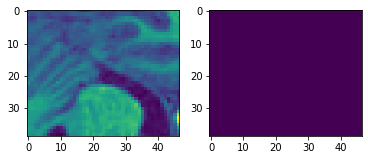

3


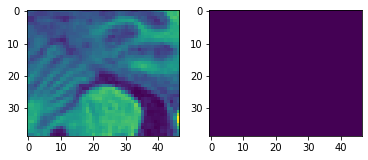

4


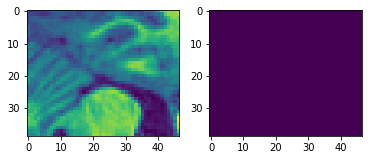

5


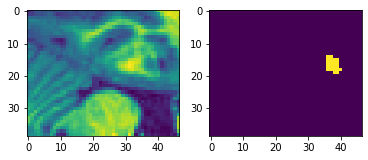

6


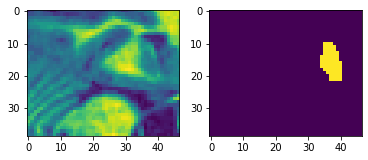

7


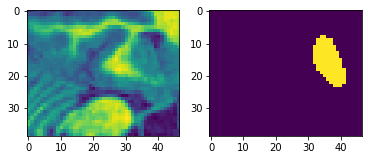

8


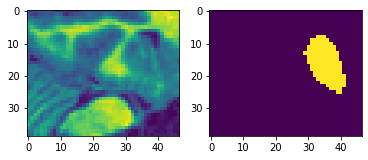

9


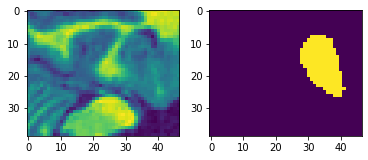

10


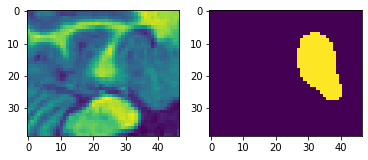

11


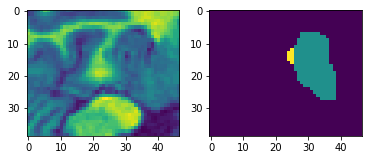

12


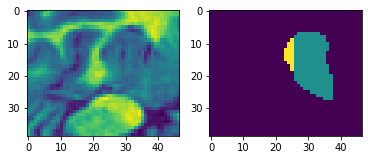

13


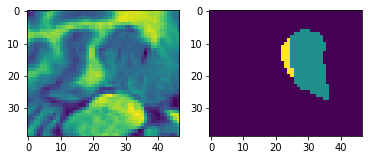

14


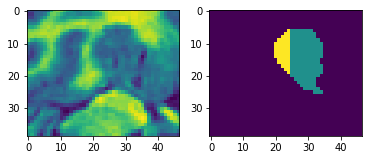

15


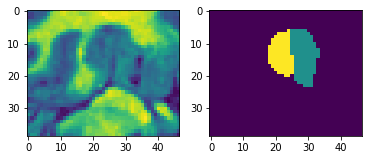

16


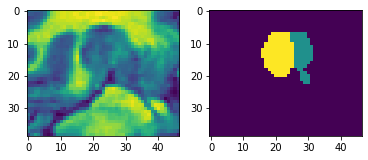

17


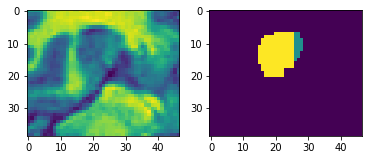

18


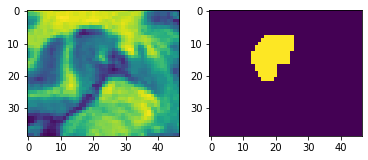

19


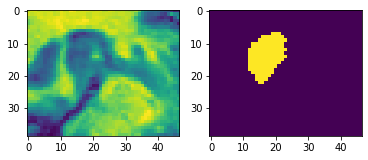

20


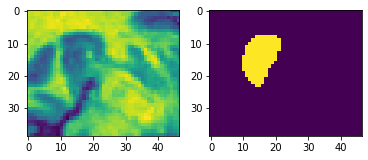

21


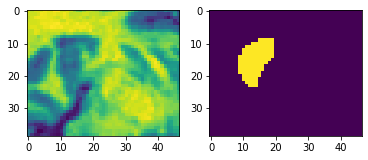

22


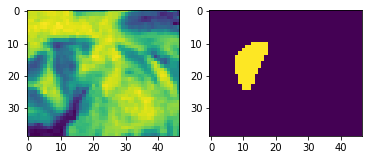

23


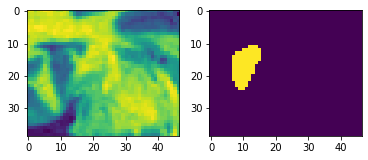

24


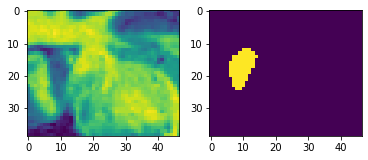

25


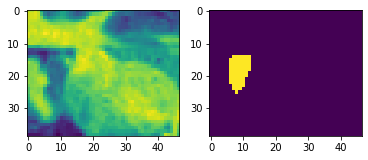

26


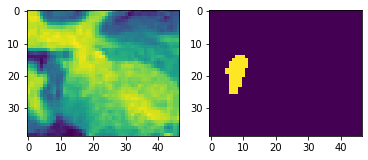

27


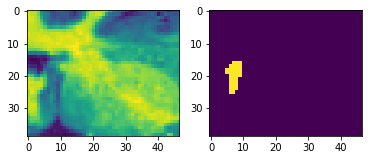

28


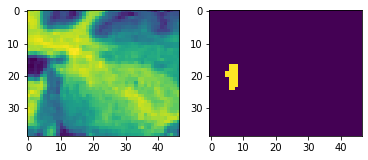

29


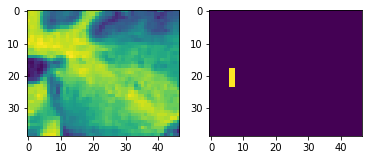

30


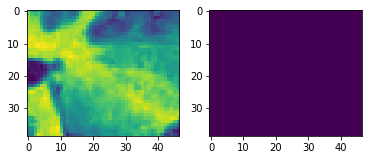

31


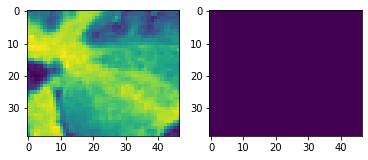

32


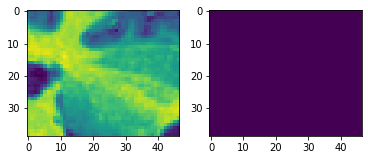

33


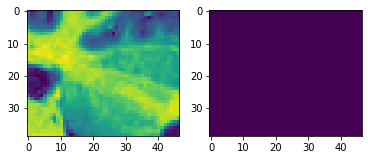

34


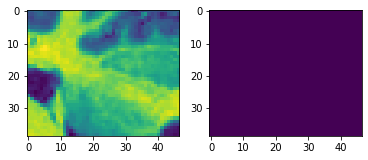

In [65]:
# test_load = nib.load(base+'imagesTr/hippocampus_001_0000.nii.gz').get_fdata()
# test_seg_load = nib.load(base+'labelsTr/hippocampus_001.nii.gz').get_fdata()
# test_load = nib.load('/content/OUTPUT_DIRECTORY/avg152T1_LR_nifti.nii.gz').get_fdata()
test='imagesTs/hippocampus_002_0000.nii.gz'
test_seg='/content/'+os.environ['OUTPUT_DIRECTORY']+'/hippocampus_002.nii.gz' 
display_results(test,test_seg)